# Tratamento do Dataset

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [ ]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

In [ ]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

#### correção: 'milage' -> INT

In [ ]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [ ]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [ ]:
data.describe()

#### NULL's

In [ ]:
data.isnull().sum()

#### counts

In [ ]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].nunique() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
# data['ext_col'].value_counts()# 11 -> nao se sabe
# data['int_col'].value_counts() # 98 -> nao se sabe
# for preco in data['price']: # tudo certo
#     if not isinstance(preco, int):
#         print('erro')

In [ ]:
len(data['milage'])
# len(data['milage'].unique())

##### --> nº de velocidades na transmissão existentes no dataset

In [ ]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

#### verificar significado de '-' e NaN para o tipo de combustível

In [ ]:
len(data.loc[data['fuel_type'] == '–'])

In [ ]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [ ]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

In [ ]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [ ]:
data[data['model_year']<1990] # outlier do 1º gráfico

In [ ]:
data[data['milage']>350000] # outlier do 2º gráfico

In [ ]:
data[data['price']>1500000] # outlier 3º gráfico

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [ ]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

#### LINEPLOT

In [ ]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [ ]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

# [ENGINE] novos atributos 

In [ ]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [ ]:
data.info()

In [ ]:
data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [ ]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [ ]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

In [ ]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

In [ ]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [ ]:
#sorted(data['Potencia'].unique())

# verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [ ]:
data.loc[data['brand'] == 'Maybach'].head()

In [ ]:
data.to_csv('train_ccols.csv', index=False)

# [SUBSETS] com dataset W/ ENGINE caract-

In [ ]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [ ]:
p.info()

In [ ]:
p.columns

In [ ]:
print(p.duplicated().sum())

### Substituir pela mediana :
- num valvulas
- num cilindros
- potencia
- capacidade_motor

In [ ]:
m = p['Numero_Valvulas'].median()
m2 = p['Numero_Cilindros'].median()
m3 = p['Potencia'].median()
m4 = p['Capacidade_Motor'].median()

p['Numero_Valvulas'].fillna(m, inplace=True)
p['Numero_Cilindros'].fillna(m2, inplace=True)
p['Potencia'].fillna(m3, inplace=True)
p['Capacidade_Motor'].fillna(m4, inplace=True)

#### Clean title

In [ ]:
p['clean_title'] = p['clean_title'].fillna('No')

### novos atributos (derivações)

#### T2

In [ ]:
# import numpy as np
p['T2'] = p['transmission'].str.extract(r'(\d+)')
p['T2'] = pd.to_numeric(p['T2'], errors='coerce')
m5 = p['T2'].mean() 
p['T2'].fillna(round(m5), inplace=True)
#p.head()
#p['T2'].isnull().sum()
# p['T2'].unique()

#### Categoria_ET (engine + transmission)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 5

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionar uma nova coluna 'Categoria' ao DataFrame com base nos clusters
p['Categoria_ET'] = kmeans.labels_
# import matplotlib.pyplot as plt

# # Contagem de amostras em cada categoria
# categoria_counts = p['Categoria_ET'].value_counts().sort_index()

# # Criar o gráfico de barras
# plt.bar(categoria_counts.index, categoria_counts.values)

# # Adicionar rótulos e título
# plt.xlabel('Categoria_ET')
# plt.ylabel('Número de amostras')
# plt.title('Distribuição das Categorias')

# Mostrar o gráfico
# plt.show()

# p['Categoria_ET'].unique()


In [ ]:
p.columns

In [ ]:
p.info()

In [ ]:
p['Categoria_ET'] = p['Categoria_ET'].astype('category')

#### Categoria Marca

In [ ]:
frequencias = p['brand'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Marca'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Marca'
    else:
        return 'Média Frequência Marca'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Marca'] = p['brand'].map(frequencias.apply(categorizar))

p['Categoria_Marca'] = p['Categoria_Marca'].astype('category')
p['Categoria_Marca'].value_counts()

#### Categoria Modelo

In [ ]:
frequencias = p['model'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Modelo'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Modelo'
    else:
        return 'Média Frequência Modelo'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Modelo'] = p['model'].map(frequencias.apply(categorizar))
p['Categoria_Modelo'] = p['Categoria_Modelo'].astype('category')
p['Categoria_Modelo'].value_counts()
p['Categoria_Modelo'].unique()

In [ ]:
p.columns

#### normalidade das novas colunas (numéricas)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Lista das colunas numéricas que você deseja analisar
colunas_numericas = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas', 'T2']

num_colunas = len(colunas_numericas)
fig, axs = plt.subplots(2, num_colunas, figsize=(15, 8))
print(f'Teste de Shapiro-Wilk: \n')

# Iterar sobre as colunas numéricas e plotar os gráficos em cada subplot
for i, coluna in enumerate(colunas_numericas):
    # Histograma
    sns.histplot(p[coluna], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'{coluna}')
    
    # Gráfico QQ
    stats.probplot(p[coluna], dist="norm", plot=axs[1, i])
    axs[1, i].set_title(f'QQ-plot')
 
    # Teste de Shapiro-Wilk
    stat, pv = stats.shapiro(p[coluna])
    print(f'{coluna}:')
    print(f'Valor p: {pv}')
    if pv > 0.05:
        print('Não podemos rejeitar a hipótese nula - A distribuição parece normal.')
    else:
        print('Rejeita-se a hipótese nula -> a distribuição não segue o modelo normal.')
    
plt.tight_layout()
plt.show()


como se pode observar, nenhum dos novos atributos (numéricos possuem distribuição normal)

# subset 1

- Substituição de valores nulos e '-' PELA MODA
- Remoção outliers LOF
- Variavies cat -> numerica

In [ ]:
data1 = p

In [ ]:
data1.describe()

In [ ]:
data1.info()

In [ ]:
data1.head()

### NULL's substitution

In [ ]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]

data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod1, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

mod7=data1['transmission'].mode()[0]
data1['transmission'] = data1['transmission'].replace('–', mod6)

#### Categoria cor interna

In [ ]:
frequencias = data1['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_IntCol'] = data1['int_col'].map(frequencias.apply(categorizar))
data1['Categoria_IntCol'] = data1['Categoria_IntCol'].astype('category')
data1['Categoria_IntCol'].value_counts()

In [ ]:
data1['ext_col'].unique()

##### Categoria cor externa

In [ ]:
frequencias = data1['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_ExtCol'] = data1['ext_col'].map(frequencias.apply(categorizar))
data1['Categoria_ExtCol'] = data1['Categoria_ExtCol'].astype('category')
data1['Categoria_ExtCol'].value_counts()
data1['Categoria_ExtCol'].unique()

#### Correlações

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = data1.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)


In [ ]:
#va's categóricas
categorical_columns = data1.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(data1[column], data1['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

### Outlier por IQR -> V.a Numéricas

In [ ]:
outlier_indices_dict = {}

# Variáveis Numéricas
for column in data1.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data1[column].quantile(0.25)
    Q3 = data1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data1[column] > Q1 - 1.5*IQR) & (data1[column] < Q3 + 1.5*IQR))

    outlier_indices_dict[column] = data1.loc[~outlier_conditional].index
    
    num_outliers = len(data1[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

###### O número de válvulas têm muito pouca correlação com o preço -> N utiliza-se essa coluna para os cenários!
###### Remove-se os 6 registros da capacidade do motor e os 57 com num de cilindros e 376 do T2


##### Remover registros com outliers (cujo correlação baixa com preço)

In [ ]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data1_s_out = data1.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data1_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data1_s_out))

In [ ]:
data1.to_csv('subset_1.csv', index=False) # sem normalizar com outliers
data1_s_out.to_csv('subset_1_s_out.csv', index=False) # sem normalizar sem outliers

# subset 2

-  substituir '-' por desconhecido
- Remoção outliers LOF
- Variavies cat -> numerica

In [ ]:
data2=p

In [ ]:
p.columns

### NULL's substitution

### Fuel Type

In [ ]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

#### accident + engine + transmission + ex_col + int_col

In [ ]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


#### Categoria cor interna

In [ ]:
frequencias = data2['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência int_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência int_col'
    else:
        return 'Média Frequência int_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_IntCol'] = data2['int_col'].map(frequencias.apply(categorizar))
data2['Categoria_IntCol'] = data2['Categoria_IntCol'].astype('category')
data2['Categoria_IntCol'].value_counts()

#### Categoria cor externa

In [ ]:
frequencias = data2['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    else:
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_ExtCol'] = data2['ext_col'].map(frequencias.apply(categorizar))
data2['Categoria_ExtCol'] = data2['Categoria_ExtCol'].astype('category')
data2['Categoria_ExtCol'].value_counts()

### Correlações

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = data2.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)

In [ ]:
#va categorica
categorical_columns = data2.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(data2[column], data2['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

### Outlier por IQR -> va.'s Numéricas

In [ ]:
# Variáveis Numéricas
for column in data2.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data2[column].quantile(0.25)
    Q3 = data2[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data2[column] > Q1 - 1.5*IQR) & (data2[column] < Q3 + 1.5*IQR))
    outlier_indices_dict[column] = data2.loc[~outlier_conditional].index
    
    num_outliers = len(data2[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

##### Remover registros com outliers (cuja correlação baixa com preço)

In [ ]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data2_s_out = data2.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data2_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data2_s_out))

In [ ]:
data2.to_csv('subset_2.csv', index=False) # sem normalizar com outliers
data2_s_out.to_csv('subset_2_s_out.csv', index=False) # sem normalizar sem outliers

In [ ]:
data2.info()

# MODELAÇÃO
### Como subset 1 é muito parecido com subset 2, só vamos utilizar o subset 1

In [90]:
import pandas as pd
subset_1=pd.read_csv('subset_1.csv')
subset_1_s_out=pd.read_csv('subset_1_s_out.csv')
pd.set_option('display.max_rows', None)

## Cenário 1 -> todas as variáveis (sem categorias extras (redundância))
#### - (se for usar todas as variáveis não da para normalizar os dados)

### com outliers

In [143]:
X1 = subset_1[['brand','model','model_year','milage','fuel_type','engine','ext_col','int_col','accident','clean_title']]
y1 = subset_1['price'] 
X1 = pd.get_dummies(X1, drop_first=True) # para var. categóricas 
# definir amostra treino e teste
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#### label logaritmizada (preço)

In [144]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# features_num=X1.select_dtypes(include=['int64','float64']).columns.tolist()
# features_cat=X1.select_dtypes(include=['object','category']).columns.tolist()

# preprocessor = make_column_transformer(
#     (StandardScaler(), features_num),
#     (OneHotEncoder(), features_cat),
# )

# # normalizar
# X1_train_norm = preprocessor.fit_transform(X1_train)
# X1_test_norm = preprocessor.transform(X1_test)

# logaritmizar
y1_train_log = np.log(y1_train)
y1_test_log = np.log(y1_test)

### sem outliers

In [108]:
X1out = subset_1_s_out[['brand','model','model_year','milage','fuel_type','engine','ext_col','int_col','accident','clean_title']] # tinha T2 » retirei...
y1out = subset_1_s_out['price'] 

from sklearn.model_selection import train_test_split
X1out_train, X1out_test, y1out_train, y1out_test = train_test_split(X1out, y1out, test_size=0.2, random_state=42)

#### normalizados e label logaritmizada

In [109]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# features_num=data2.select_dtypes(include=['int64','float64']).columns.tolist()
# features_cat=data2.select_dtypes(include=['object','category']).columns.tolist()

# preprocessor = make_column_transformer(
#     (StandardScaler(), features_num),
#     (OneHotEncoder(), features_cat),
# )

# normalizar
# X1out_train_norm = preprocessor.fit_transform(X1_train) 
# X1out_valid_norm = preprocessor.transform(X1_test)
# logaritmizar
y1out_train_log = np.log(y1out_train) # »»» mudei y1_train para y1out_train «««
y1out_test_log = np.log(y1out_test) # »»» y1_train para y1out_test «««

# Cenário 2 (todas as variáveis (categorias))

#### com outliers

In [ ]:
X2 = subset_1[['model_year', 'milage', 'fuel_type', 'accident', 'clean_title', 'Categoria_ET', 'Categoria_Marca', 'Categoria_Modelo', 'Categoria_IntCol', 'Categoria_ExtCol']]
y2 = subset_1['price'] 

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#### Normalização + label logaritmizada

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

features_num=X2.select_dtypes(include=['int64','float64']).columns.tolist()
features_cat=X2.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

X2_train_norm = preprocessor.fit_transform(X2_train)
X2_test_norm = preprocessor.transform(X2_test)
y2_train_log = np.log(y2_train)
y2_test_log = np.log(y2_test)

#### sem outlier

In [ ]:
X2out = subset_1_s_out[['model_year','milage','fuel_type','accident','clean_title','Categoria_ET','Categoria_Marca','Categoria_Modelo','Categoria_IntCol','Categoria_ExtCol']]  
y2out = subset_1_s_out['price'] 

from sklearn.model_selection import train_test_split
X2out_train, X2out_test, y2out_train, y2out_test = train_test_split(X2out, y2out, test_size=0.2, random_state=42)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

features_num=X2.select_dtypes(include=['int64','float64']).columns.tolist()
features_cat=X2.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

X2out_train_norm = preprocessor.fit_transform(X2_train)
X2out_valid_norm = preprocessor.transform(X2_test)
y2out_train_log = np.log(y2_train)
y2out_test_log = np.log(y2_test)

## Cenário 3 (ao olho, características do carro novo sem influência do condutor)

In [ ]:
[['model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]

## Cenário 4 (ao olho, características do carro com influência do condutor)

In [ ]:
[['model_year', 'milage' 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'accident', 'clean_title', 'Categoria_IntCol', 'Categoria_ExtCol']]

## Cenário 5 = cenário 4 subsituindo 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2' por 'Categoria_ET'

In [ ]:
from imblearn.over_sampling import SMOTE

# Passo 1: Instanciar o Objeto SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Passo 2: Aplicar o SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Passo 3: Verificar o Resultado
print("Tamanho do conjunto de dados antes do SMOTE:", len(X), len(y))
print("Tamanho do conjunto de dados após o SMOTE:", len(X_resampled), len(y_resampled))

# previsões para cenário 1

### Separar Data / Treinar e Avaliar Algoritmos

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
from slickml.metrics import (
    RegressionMetrics,
)  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
import shap

In [149]:
print("Shape of X1_train:", X1_train.shape)
print("Shape of X1_test:", X1_test.shape)
print("Shape of y1_train:", y1_train.shape)
print("Shape of y1_test:", y1_test.shape)
# com log
print("Shape of y1_train_log:", y1_train_log.shape)
print("Shape of y1_test_log:", y1_test_log.shape)

# os tests estão com 642 rows
# treino com 2565

Shape of X1_train: (2565, 3148)
Shape of X1_test: (642, 3148)
Shape of y1_train: (2565,)
Shape of y1_test: (642,)
Shape of y1_train_log: (2565,)
Shape of y1_test_log: (642,)


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
# model.fit(X1_train, y1_train)
model.fit(X1_train, y1_train_log)

LinearRegression()

In [151]:
# Make predictions
y_pred = model.predict(X1_test)

### random forest

In [152]:
# train and predict with Random Forest Regressor
RF = RandomForestRegressor()
# RF.fit(X1_train, y1_train)
RF.fit(X1_train, y1_train_log)
pred = RF.predict(X1_test)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.717000,0.718000,0.326000,0.224000,0.002000,0.032000,0.968000,0.044000,1.000000


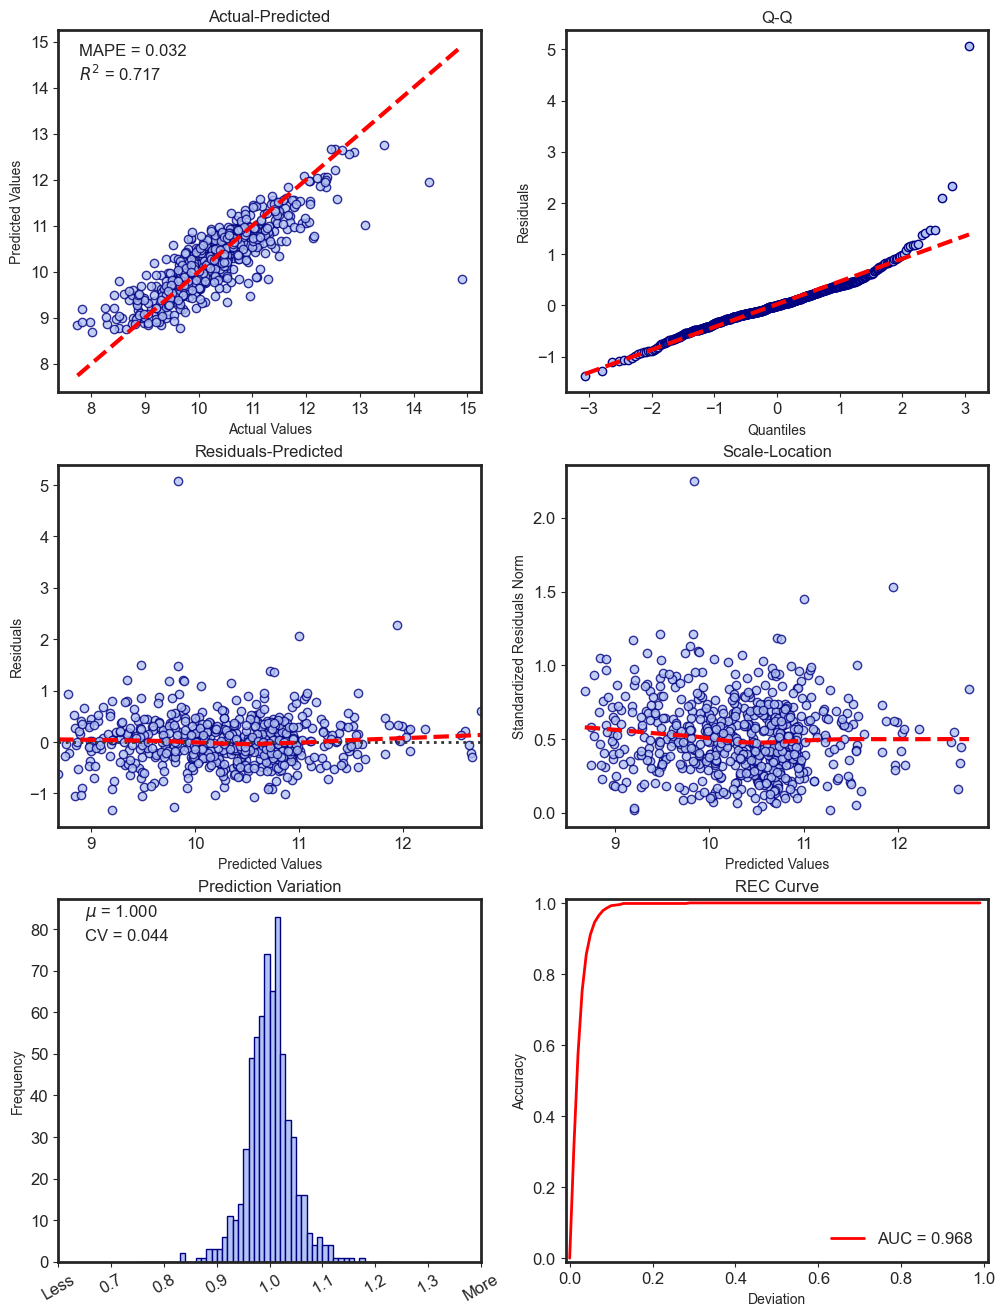

In [153]:
# Regression metrics for Random Forest
# reg_metrics = RegressionMetrics(y1_test, pred)
reg_metrics = RegressionMetrics(y1_test_log, pred)
reg_metrics.plot()

### ada boost

In [154]:
# train and predict with Adaboost Regressor
AR = AdaBoostRegressor()
# AR.fit(X1_train, y1_train)
AR.fit(X1_train, y1_train_log)
pred2 = AR.predict(X1_test)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.581000,0.592000,0.438000,0.332000,0.002000,0.042000,0.960000,0.053000,1.012000


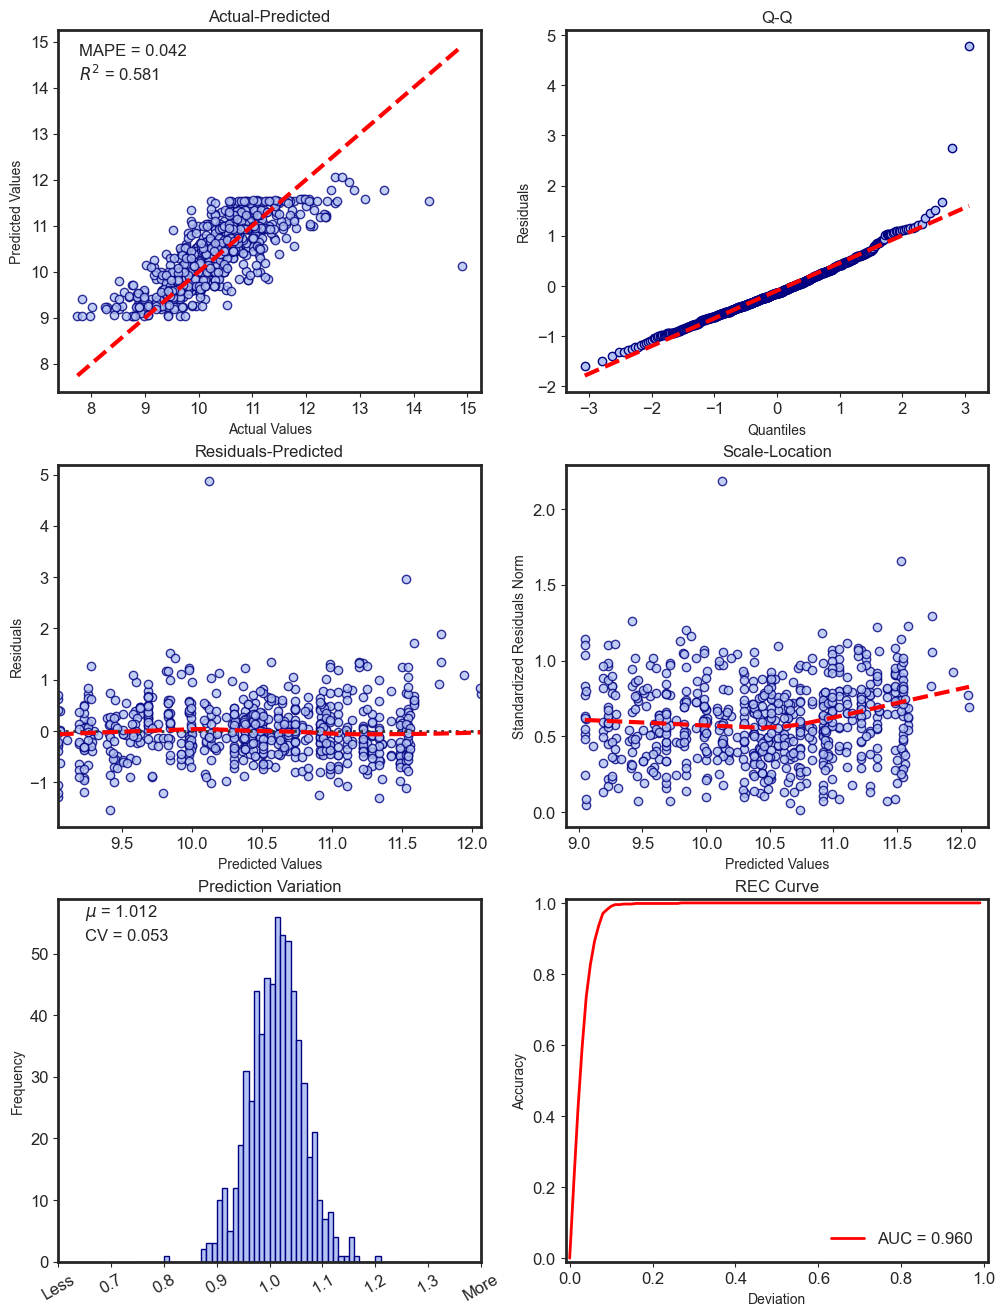

In [155]:
# Regression metrics for Adaboost
# reg_metrics2 = RegressionMetrics(y1_test, pred2)
reg_metrics2 = RegressionMetrics(y1_test_log, pred2)
reg_metrics2.plot()

### decision tree

In [156]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X1_train, y1_train)
DT.fit(X1_train, y1_train_log)
pred3 = DT.predict(X1_test)

[]

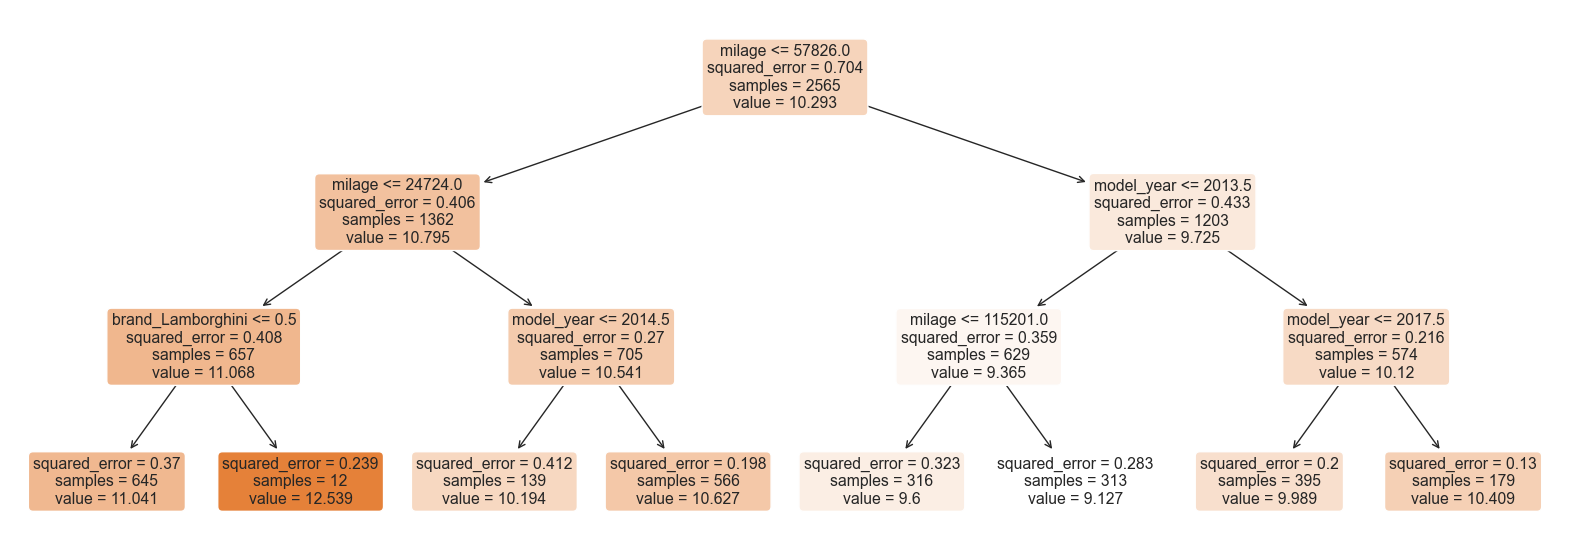

In [157]:
plt.figure(figsize=(20, 7))
tree.plot_tree(
    DT, feature_names=X1.columns, filled=True, rounded=True
)
plt.plot()

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.567000,0.567000,0.426000,0.343000,0.003000,0.041000,0.961000,0.054000,1.004000


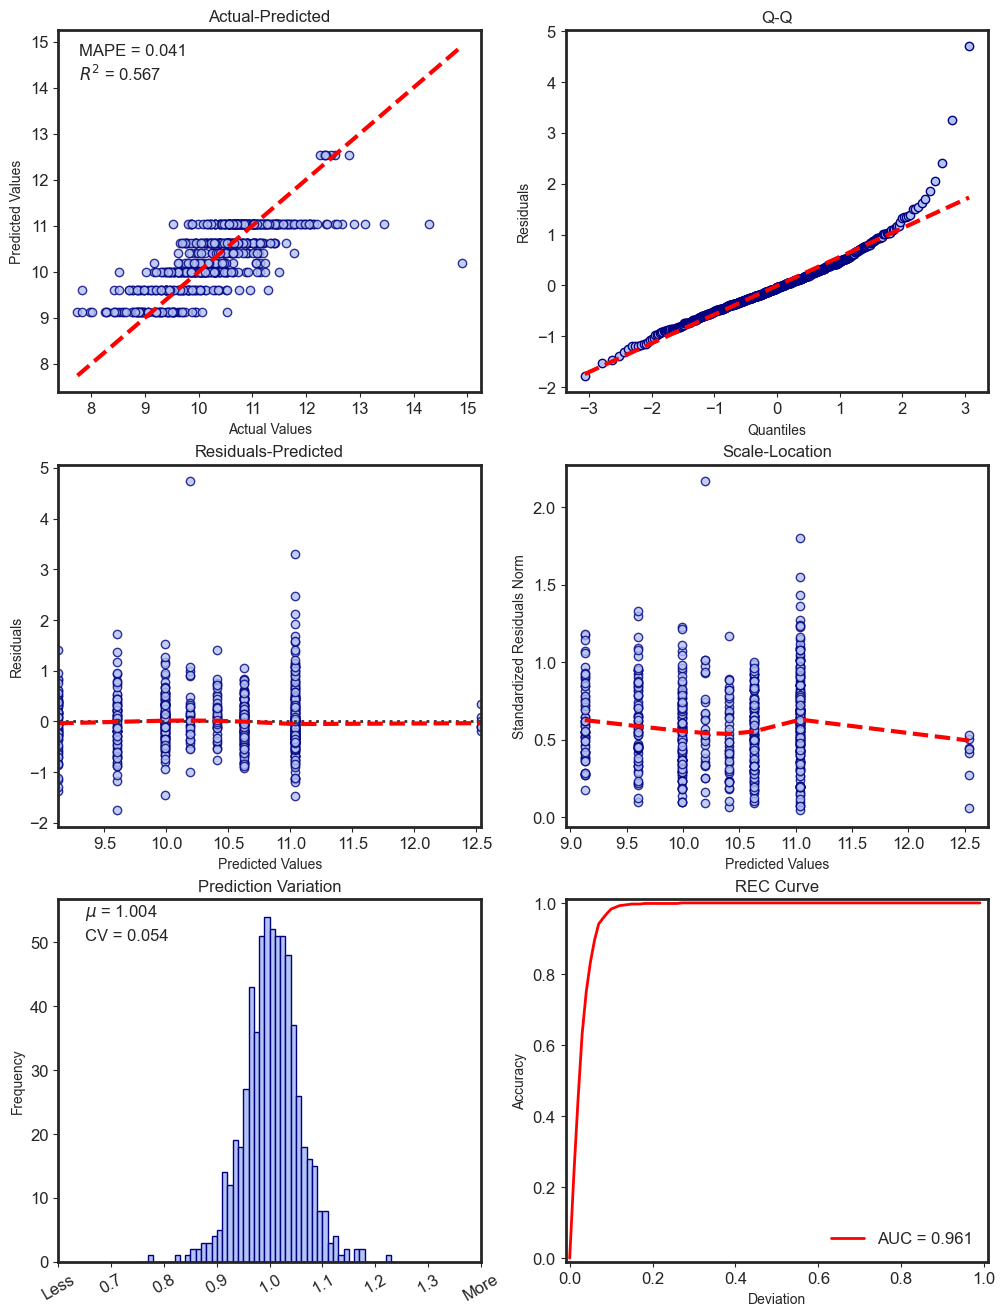

In [158]:
# Regression metrics for Decision Tree
# reg_metrics3 = RegressionMetrics(y1_test, pred3)
reg_metrics3 = RegressionMetrics(y1_test_log, pred3)

reg_metrics3.plot()

## comparação dos resultados

In [159]:
# Random Forest deviation and accuracy values (for custom visualization)
RF_dev = reg_metrics.deviation_
RF_acc = reg_metrics.accuracy_
# Adaboost deviation and accuracy values (for custom visualization)
AR_dev = reg_metrics2.deviation_
AR_acc = reg_metrics2.accuracy_
# Decision Tree deviation and accuracy values (for custom visualization)
DT_dev = reg_metrics3.deviation_
DT_acc = reg_metrics3.accuracy_

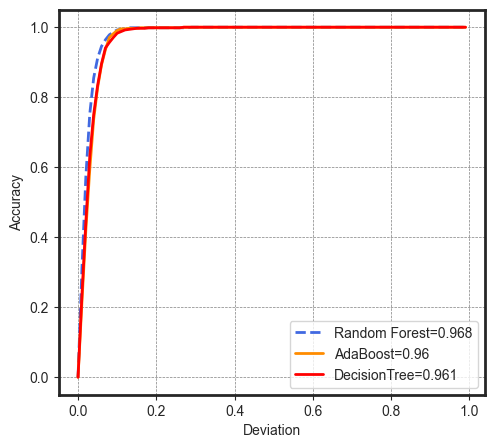

In [160]:
# REC curve - comparison of models
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
plt.plot(
    RF_dev,
    RF_acc,
    color="royalblue",
    ls="--",
    lw=2,
    label="Random Forest={}".format(round(reg_metrics.auc_rec_, 3)),
)
plt.plot(
    AR_dev,
    AR_acc,
    color="darkorange",
    ls="-",
    lw=2,
    label="AdaBoost={}".format(round(reg_metrics2.auc_rec_, 3)),
)
plt.plot(
    DT_dev,
    DT_acc,
    color="red",
    ls="-",
    lw=2,
    label="DecisionTree={}".format(round(reg_metrics3.auc_rec_, 3)),
)
plt.legend(loc=4)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.xlabel("Deviation")
plt.ylabel("Accuracy")
plt.show()

In [161]:
metrics = pd.concat(
    [
        reg_metrics.get_metrics(),
        reg_metrics2.get_metrics(),
        reg_metrics3.get_metrics(),
    ]
)
metrics.index = ["RandomForest", "AdaBoost", "DecisionTree"]
metrics

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
RandomForest,0.717,0.718,0.326,0.224,0.002,0.032,0.968,0.044,1.000
AdaBoost,0.581,0.592,0.438,0.332,0.002,0.042,0.960,0.053,1.012
DecisionTree,0.567,0.567,0.426,0.343,0.003,0.041,0.961,0.054,1.004


# >> que delícia »»» log(price)